In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (11, 7)

In [2]:
df =  pd.read_csv('dataFine.csv')

C:\Users\victo\AppData\Local\Temp\ipykernel_13596\4043669217.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv('dataFine.csv')


In [3]:
data_3_t = pd.pivot_table(df, values="count",index=["year",'month','find_new_job'], aggfunc="sum").reset_index()
month = [ 'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
data_3_t['month'] = pd.Categorical(data_3_t['month'], categories = month, ordered=True)

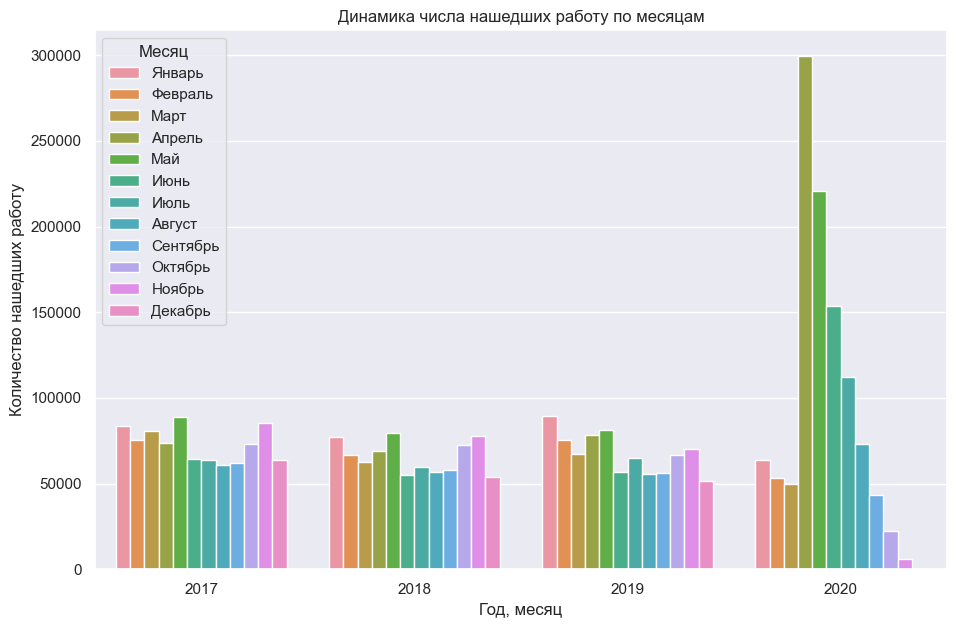

In [4]:
sns.set_theme()

sns.barplot(data=data_3_t[data_3_t['find_new_job']==True],x='year',y='count', hue = 'month', ci=False).set(xlabel='Год, месяц', ylabel = 'Количество нашедших работу', title = 'Динамика числа нашедших работу по месяцам')

plt.legend(title='Месяц', loc='upper left')

plt.savefig('Task3_1.png')

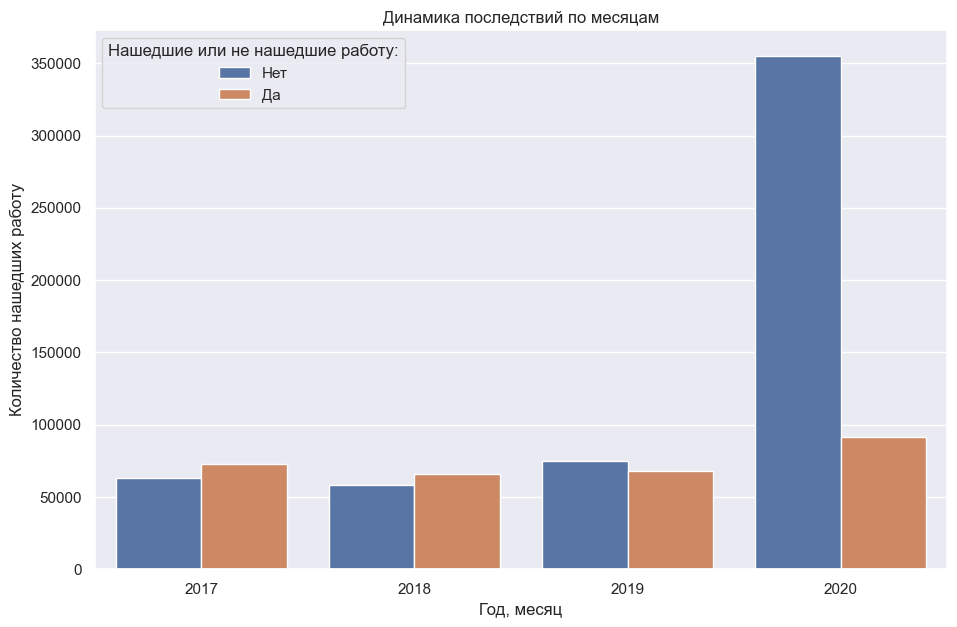

In [5]:
data_3_t = data_3_t.replace({'find_new_job':{True:"Да", False:"Нет"}})

sns.barplot(data=data_3_t,x='year',y='count', hue = 'find_new_job', ci=False).set(xlabel='Год, месяц', ylabel = 'Количество нашедших работу', title = 'Динамика последствий по месяцам')
plt.legend(title='Нашедшие или не нашедшие работу:')
plt.savefig('Task3_2.png')

In [6]:
data_3_t[(data_3_t['year']==2017)]['count'].sum()

1636952

In [7]:
overall=data_3_t['count'].sum()
data_3_t=data_3_t[data_3_t['find_new_job']=="Да"]
data_3_t['%_per_month'] = data_3_t['count'] / overall *100
data_3_t

,year,month,find_new_job,count,%_per_month
1,2017,Август,Да,60830,0.596945
3,2017,Апрель,Да,73932,0.725520
5,2017,Декабрь,Да,63725,0.625355
7,2017,Июль,Да,63605,0.624177
9,2017,Июнь,Да,64218,0.630193
11,2017,Май,Да,89070,0.874074
13,2017,Март,Да,80925,0.794144
15,2017,Ноябрь,Да,85272,0.836803
17,2017,Октябрь,Да,73158,0.717924
19,2017,Сентябрь,Да,62161,0.610007


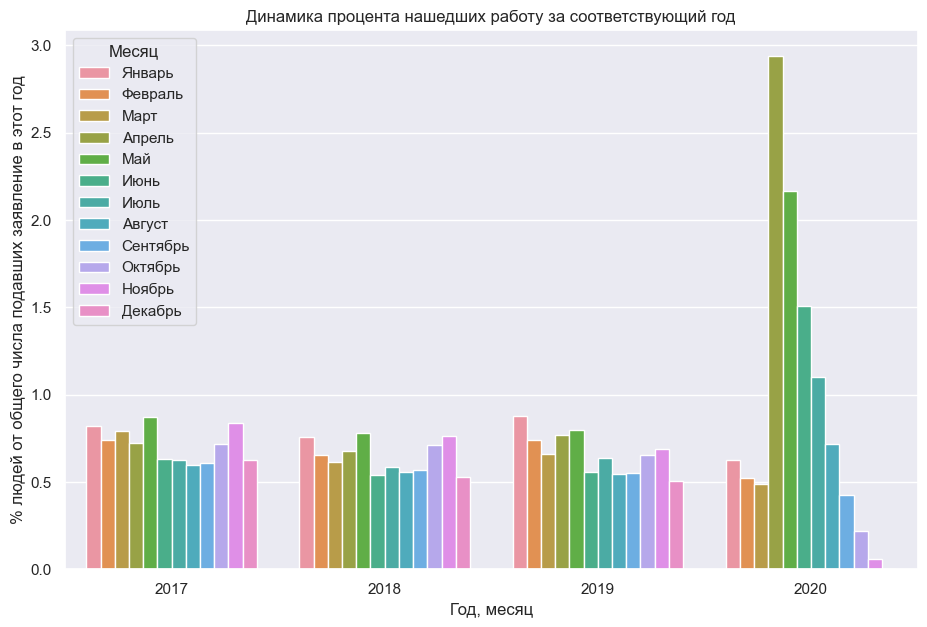

In [18]:
sns.barplot(data=data_3_t,x='year', y= '%_per_month', hue="month", estimator = np.sum).set(title='Динамика процента нашедших работу за соответствующий год', xlabel = 'Год, месяц', ylabel = '% людей от общего числа подавших заявление в этот год')
plt.legend(title='Месяц')

plt.savefig('Task3_3.png')

In [13]:
data_3_t[(data_3_t['year']==2020) & (data_3_t['find_new_job']=='Да')]['%_per_month'].sum()

10.768645290471817

In [57]:
data_3_t['%_per_month'].sum()

35.0990568009661